In [1]:
from dslabs_functions import set_chart_labels
from dslabs_functions import define_grid, HEIGHT
from matplotlib.pyplot import savefig, show, subplots
from matplotlib.figure import Figure
from numpy import ndarray
from dslabs_functions import *
from matplotlib.pyplot import figure, savefig, show
from pandas import read_csv, DataFrame
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
from dslabs_functions import plot_multiline_chart

In [2]:
filename = "datasets/class_credit_score.csv"
file_tag = "credit_score"
data: DataFrame = read_csv(filename, na_values="", index_col="ID")

## Data Distribution

In [3]:
variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
summary5: DataFrame = data.describe(include="all")
print(summary5[numeric])

        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count    1.000000e+05           84998.000000      100000.000000   
unique            NaN                    NaN                NaN   
top               NaN                    NaN                NaN   
freq              NaN                    NaN                NaN   
mean     1.764157e+05            4194.170850          17.091280   
std      1.429618e+06            3183.686167         117.404834   
min      7.005930e+03             303.645417          -1.000000   
25%      1.945750e+04            1625.568229           3.000000   
50%      3.757861e+04            3093.745000           6.000000   
75%      7.279092e+04            5957.448333           7.000000   
max      2.419806e+07           15204.633330        1798.000000   

        Num_Credit_Card  Interest_Rate      NumofLoan  Delay_from_due_date  \
count      100000.00000  100000.000000  100000.000000        100000.000000   
unique              NaN            NaN 

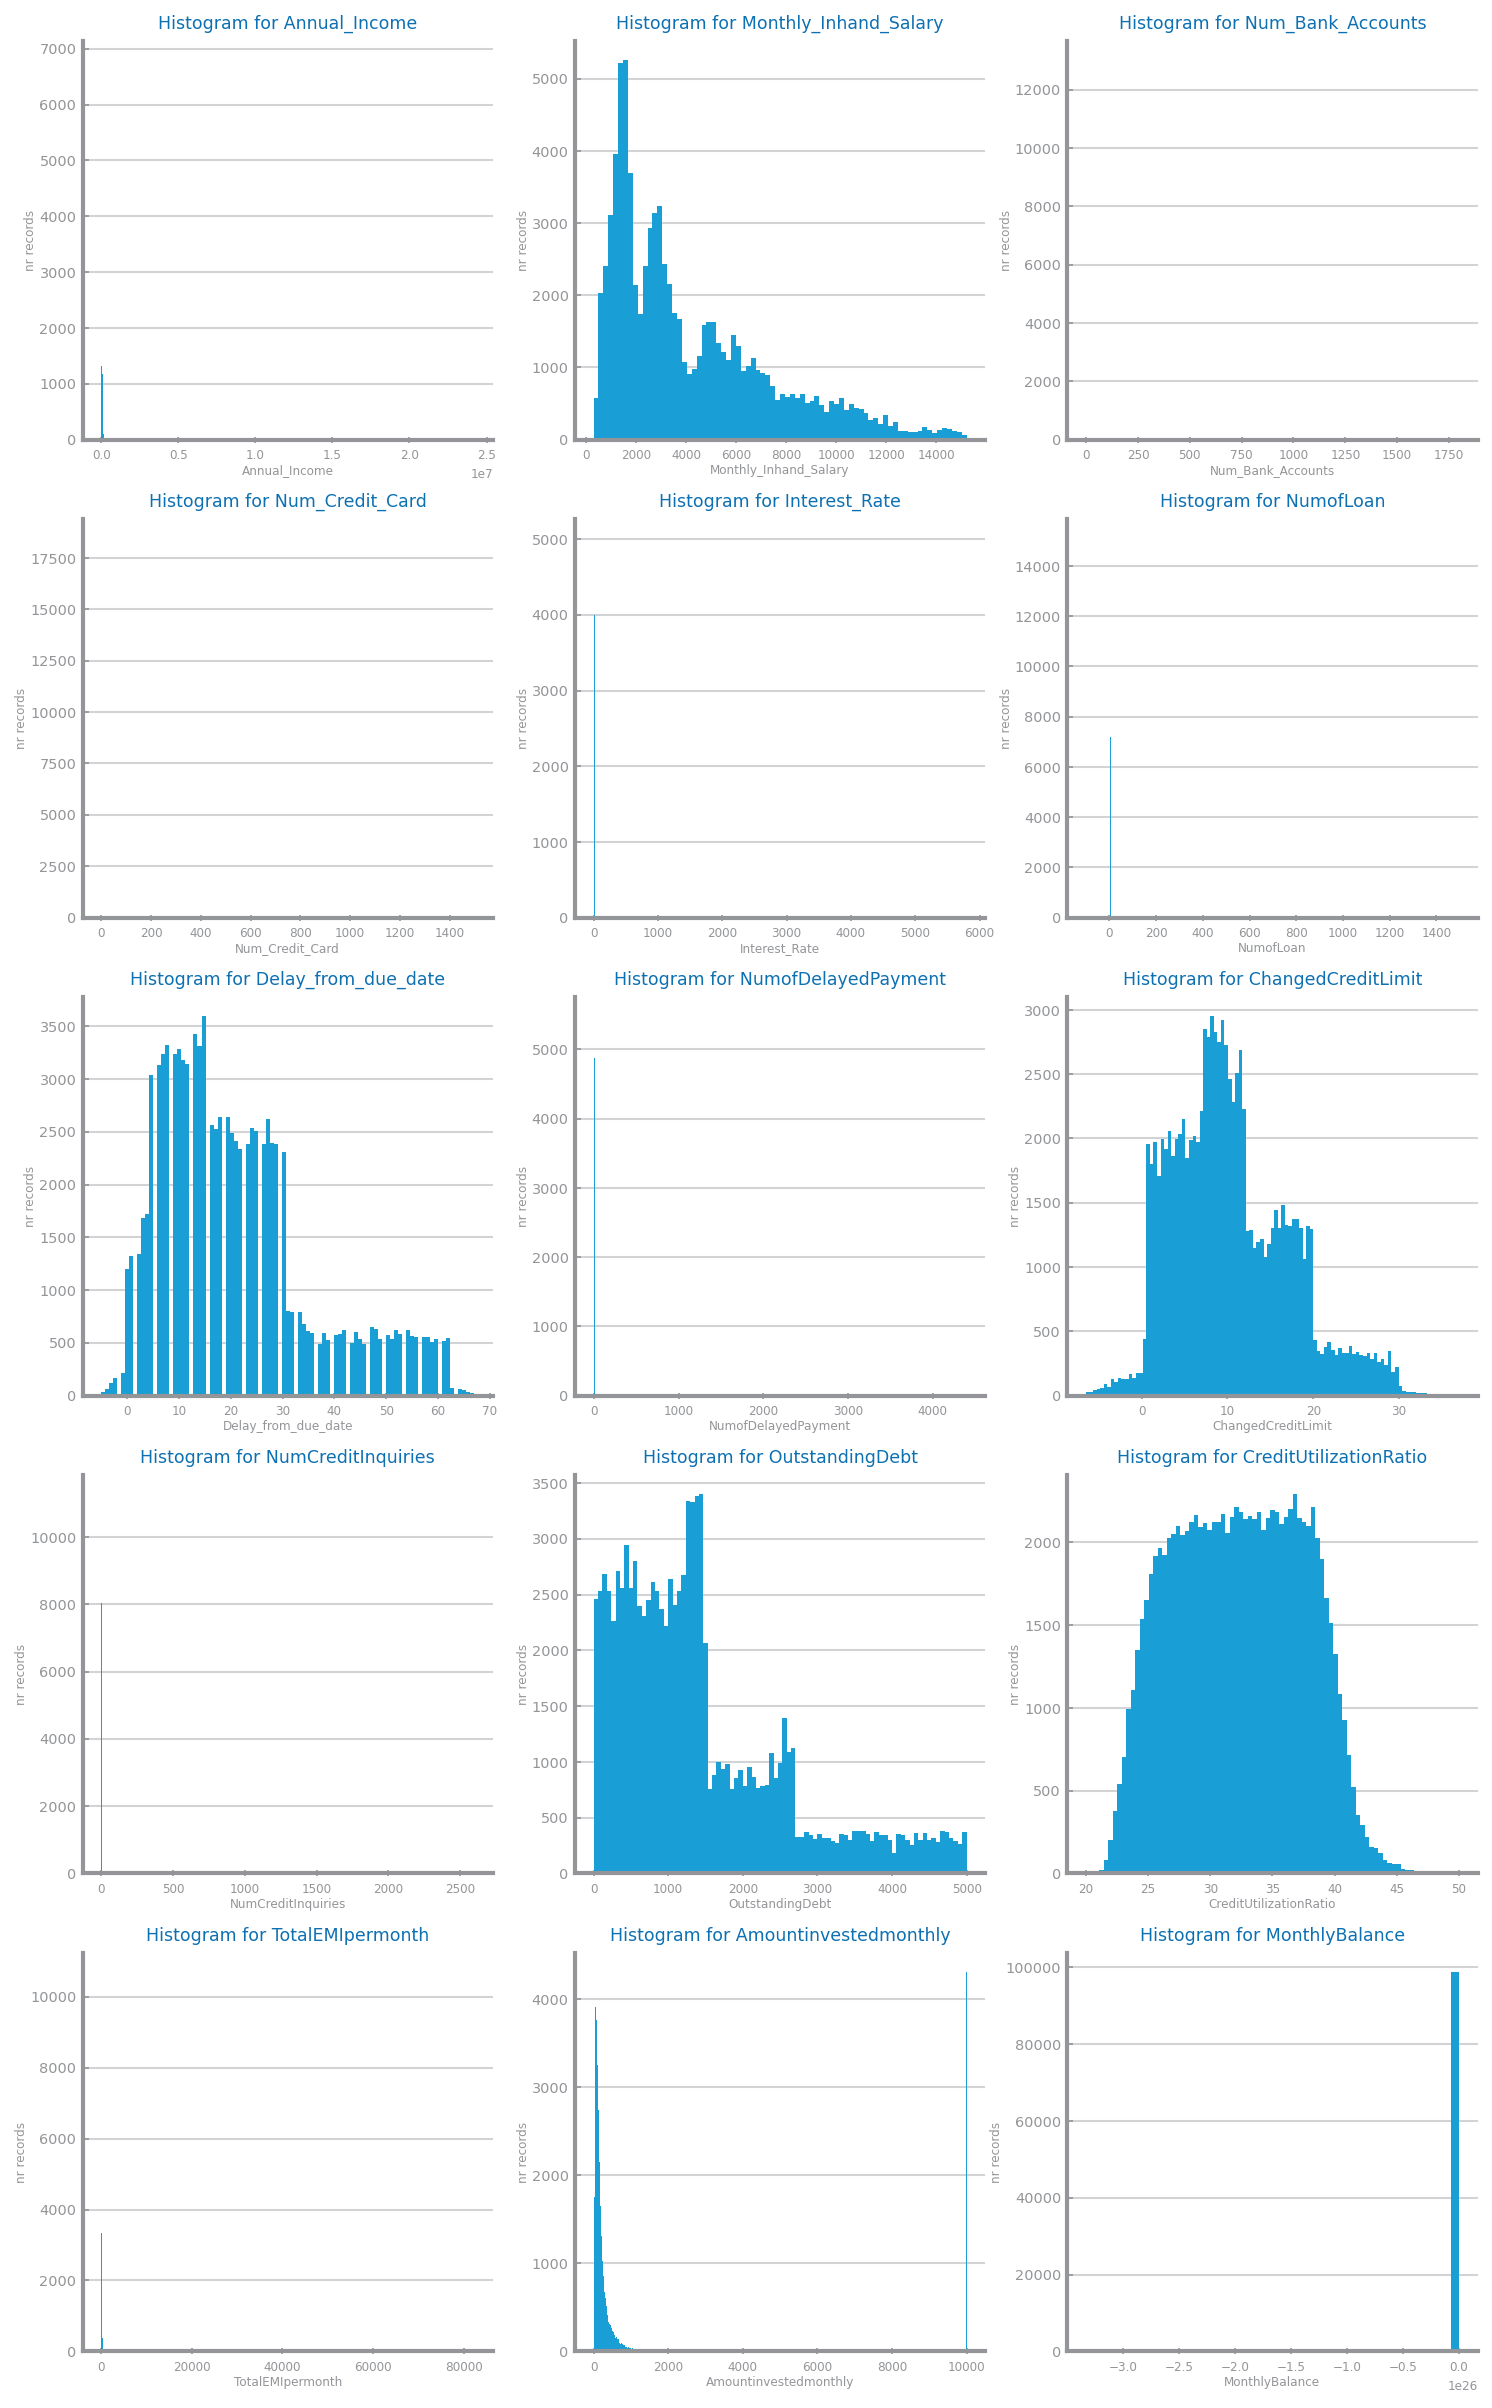

In [25]:
# HISTOGRAMS
if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)-1):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(data[numeric[n]].dropna().values, 'auto')
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    # monthly balance:
    n += 1
    set_chart_labels(
        axs[i, j],
        title=f"Histogram for {numeric[n]}",
        xlabel=numeric[n],
        ylabel="nr records",
    )
    axs[i, j].hist(data[numeric[n]].dropna().values, 50)
    i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    savefig(f"images/{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

In [ ]:
# HISTOGRAMS
if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)-1):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(data[numeric[n]].dropna().values, 3)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    # monthly balance:
    n += 1
    set_chart_labels(
        axs[i, j],
        title=f"Histogram for {numeric[n]}",
        xlabel=numeric[n],
        ylabel="nr records",
    )
    axs[i, j].hist(data[numeric[n]].dropna().values, 50)
    i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    savefig(f"images/{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

In [36]:
#data = data.sample(frac=0.05, replace=False)


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = lognorm.fit(x_values)
    distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
        x_values, sigma, loc, scale
    )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    ax.hist(values, 20, density=True)
    distributions: dict = compute_known_distributions(values)
    plot_multiline_chart(
        values,
        distributions,
        ax=ax,
        title="Best fit for %s" % var,
        xlabel=var,
        ylabel="",
    )


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], data[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")

KeyboardInterrupt: 

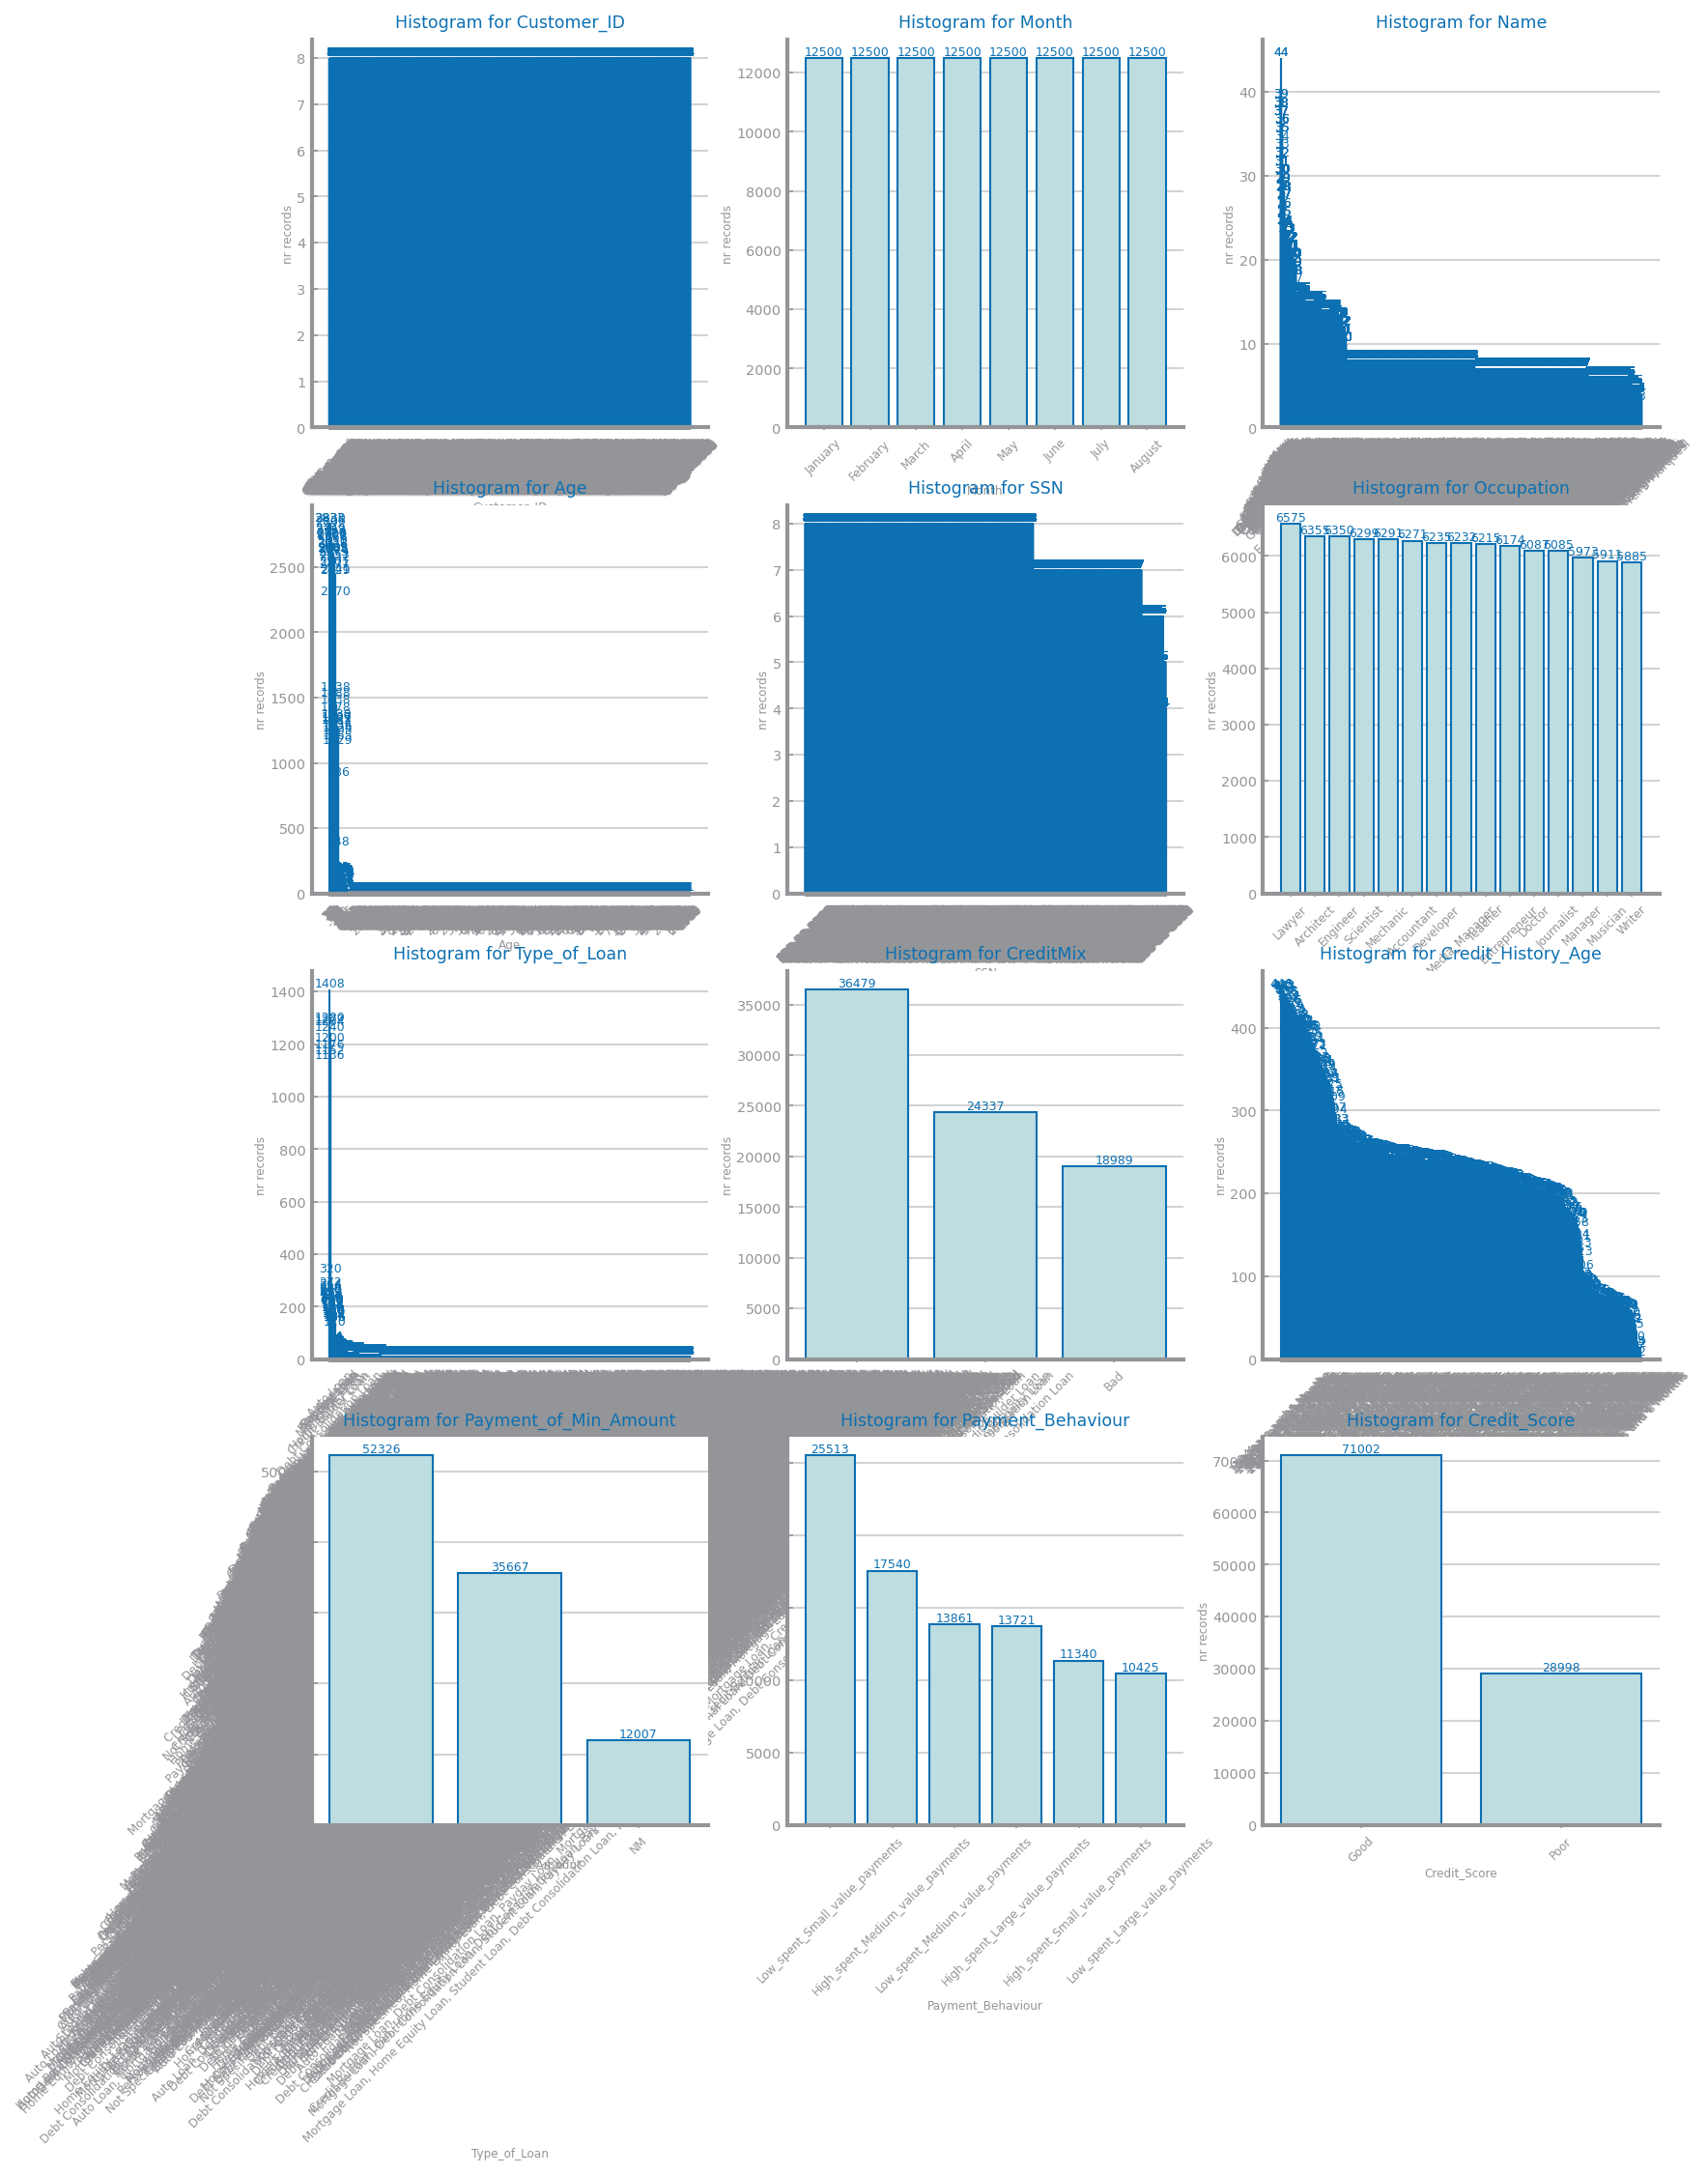

In [15]:
from dslabs_functions import plot_bar_chart

symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = data[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_histograms_symbolic2.png", bbox_inches="tight")
    show()
else:
    print("There are no symbolic variables.")

Credit_Score
Good    71002
Poor    28998
Name: count, dtype: int64


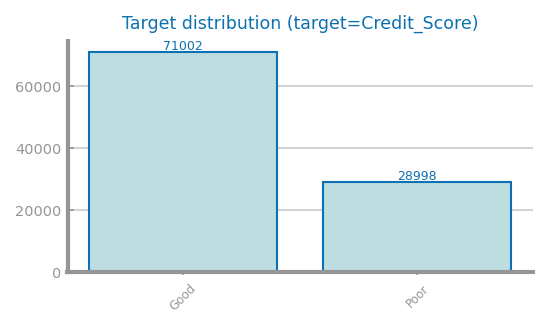

In [4]:
target = "Credit_Score"

values: Series = data[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"images/{file_tag}_class_distribution.png", bbox_inches="tight")
show()

In [5]:
data = data.dropna()
vars: list = data.columns.to_list()

if [] != vars:
    n: int = len(vars) - 1
    #fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        print("var: " + n)
        figure()
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j - 1])
            savefig(f"images/{file_tag}_sparsity_per_class_study_{n}.png")
else:
    print("Sparsity per class: there are no variables.")

KeyboardInterrupt: 